## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  23.613143  1315.714900  0.755599   8.787528  994.435595
1  38.467863   673.830298  0.326999   6.498764  223.533876
2  16.664409  1324.073029  0.483981   6.027186  641.080341
3  67.876925   937.978332  0.730400  10.781926  688.262191
4  96.013047  1535.870587  0.551508   9.569053  852.376096


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9812522	total: 56.5ms	remaining: 56.5s
1:	learn: 0.9699869	total: 57.1ms	remaining: 28.5s
2:	learn: 0.9584580	total: 57.5ms	remaining: 19.1s
3:	learn: 0.9477542	total: 58ms	remaining: 14.4s
4:	learn: 0.9350408	total: 58.4ms	remaining: 11.6s
5:	learn: 0.9249030	total: 58.9ms	remaining: 9.76s
6:	learn: 0.9145609	total: 59.3ms	remaining: 8.42s
7:	learn: 0.9038515	total: 59.7ms	remaining: 7.4s
8:	learn: 0.8921582	total: 60.1ms	remaining: 6.62s
9:	learn: 0.8815374	total: 60.6ms	remaining: 6s
10:	learn: 0.8718654	total: 61.1ms	remaining: 5.49s
11:	learn: 0.8591006	total: 61.6ms	remaining: 5.08s
12:	learn: 0.8487198	total: 62.1ms	remaining: 4.71s
13:	learn: 0.8382428	total: 62.6ms	remaining: 4.41s
14:	learn: 0.8272616	total: 63ms	remaining: 4.13s
15:	learn: 0.8191351	total: 63.4ms	remaining: 3.9s
16:	learn: 0.8076275	total: 63.8ms	remaining: 3.69s
17:	learn: 0.7993234	total: 64.3ms	remaining: 3.5s
18:	learn: 0.7914949	total: 64.7ms	remaining: 3.34s
19

101:	learn: 0.2988958	total: 101ms	remaining: 885ms
102:	learn: 0.2958214	total: 101ms	remaining: 879ms
103:	learn: 0.2928753	total: 101ms	remaining: 874ms
104:	learn: 0.2890172	total: 102ms	remaining: 869ms
105:	learn: 0.2860605	total: 102ms	remaining: 863ms
106:	learn: 0.2832490	total: 103ms	remaining: 857ms
107:	learn: 0.2796734	total: 103ms	remaining: 852ms
108:	learn: 0.2769610	total: 104ms	remaining: 847ms
109:	learn: 0.2736057	total: 104ms	remaining: 841ms
110:	learn: 0.2707343	total: 104ms	remaining: 836ms
111:	learn: 0.2675950	total: 105ms	remaining: 831ms
112:	learn: 0.2644533	total: 105ms	remaining: 825ms
113:	learn: 0.2614562	total: 105ms	remaining: 819ms
114:	learn: 0.2594665	total: 106ms	remaining: 815ms
115:	learn: 0.2566972	total: 106ms	remaining: 810ms
116:	learn: 0.2538167	total: 107ms	remaining: 806ms
117:	learn: 0.2519255	total: 107ms	remaining: 802ms
118:	learn: 0.2490231	total: 108ms	remaining: 797ms
119:	learn: 0.2463385	total: 108ms	remaining: 793ms
120:	learn: 

309:	learn: 0.0544588	total: 186ms	remaining: 414ms
310:	learn: 0.0541377	total: 186ms	remaining: 413ms
311:	learn: 0.0538343	total: 187ms	remaining: 412ms
312:	learn: 0.0535502	total: 187ms	remaining: 411ms
313:	learn: 0.0532602	total: 188ms	remaining: 410ms
314:	learn: 0.0529735	total: 188ms	remaining: 409ms
315:	learn: 0.0526326	total: 188ms	remaining: 407ms
316:	learn: 0.0524136	total: 189ms	remaining: 407ms
317:	learn: 0.0521312	total: 189ms	remaining: 405ms
318:	learn: 0.0518521	total: 189ms	remaining: 404ms
319:	learn: 0.0515780	total: 190ms	remaining: 403ms
320:	learn: 0.0513355	total: 190ms	remaining: 402ms
321:	learn: 0.0510549	total: 191ms	remaining: 402ms
322:	learn: 0.0507908	total: 191ms	remaining: 401ms
323:	learn: 0.0505340	total: 192ms	remaining: 400ms
324:	learn: 0.0502544	total: 192ms	remaining: 399ms
325:	learn: 0.0500381	total: 192ms	remaining: 398ms
326:	learn: 0.0498015	total: 193ms	remaining: 397ms
327:	learn: 0.0495522	total: 193ms	remaining: 396ms
328:	learn: 

515:	learn: 0.0228458	total: 283ms	remaining: 266ms
516:	learn: 0.0227605	total: 284ms	remaining: 265ms
517:	learn: 0.0226699	total: 284ms	remaining: 264ms
518:	learn: 0.0226081	total: 285ms	remaining: 264ms
519:	learn: 0.0225188	total: 285ms	remaining: 263ms
520:	learn: 0.0224610	total: 286ms	remaining: 263ms
521:	learn: 0.0223800	total: 286ms	remaining: 262ms
522:	learn: 0.0223210	total: 286ms	remaining: 261ms
523:	learn: 0.0222647	total: 287ms	remaining: 261ms
524:	learn: 0.0222054	total: 287ms	remaining: 260ms
525:	learn: 0.0221474	total: 288ms	remaining: 259ms
526:	learn: 0.0220890	total: 288ms	remaining: 259ms
527:	learn: 0.0220006	total: 289ms	remaining: 258ms
528:	learn: 0.0219268	total: 289ms	remaining: 258ms
529:	learn: 0.0218729	total: 290ms	remaining: 257ms
530:	learn: 0.0217870	total: 290ms	remaining: 256ms
531:	learn: 0.0217297	total: 291ms	remaining: 256ms
532:	learn: 0.0216732	total: 291ms	remaining: 255ms
533:	learn: 0.0216023	total: 292ms	remaining: 255ms
534:	learn: 

701:	learn: 0.0132788	total: 368ms	remaining: 156ms
702:	learn: 0.0132367	total: 369ms	remaining: 156ms
703:	learn: 0.0131875	total: 369ms	remaining: 155ms
704:	learn: 0.0131647	total: 370ms	remaining: 155ms
705:	learn: 0.0131424	total: 370ms	remaining: 154ms
706:	learn: 0.0131207	total: 370ms	remaining: 154ms
707:	learn: 0.0130989	total: 371ms	remaining: 153ms
708:	learn: 0.0130718	total: 371ms	remaining: 152ms
709:	learn: 0.0130500	total: 372ms	remaining: 152ms
710:	learn: 0.0130285	total: 372ms	remaining: 151ms
711:	learn: 0.0130056	total: 373ms	remaining: 151ms
712:	learn: 0.0129844	total: 373ms	remaining: 150ms
713:	learn: 0.0129495	total: 374ms	remaining: 150ms
714:	learn: 0.0129274	total: 374ms	remaining: 149ms
715:	learn: 0.0129011	total: 375ms	remaining: 149ms
716:	learn: 0.0128669	total: 375ms	remaining: 148ms
717:	learn: 0.0128240	total: 376ms	remaining: 148ms
718:	learn: 0.0127982	total: 376ms	remaining: 147ms
719:	learn: 0.0127404	total: 377ms	remaining: 146ms
720:	learn: 

920:	learn: 0.0082947	total: 465ms	remaining: 39.9ms
921:	learn: 0.0082831	total: 466ms	remaining: 39.4ms
922:	learn: 0.0082606	total: 466ms	remaining: 38.9ms
923:	learn: 0.0082454	total: 467ms	remaining: 38.4ms
924:	learn: 0.0082299	total: 467ms	remaining: 37.9ms
925:	learn: 0.0082089	total: 468ms	remaining: 37.4ms
926:	learn: 0.0081939	total: 468ms	remaining: 36.9ms
927:	learn: 0.0081732	total: 469ms	remaining: 36.4ms
928:	learn: 0.0081574	total: 469ms	remaining: 35.9ms
929:	learn: 0.0081467	total: 470ms	remaining: 35.4ms
930:	learn: 0.0081248	total: 470ms	remaining: 34.8ms
931:	learn: 0.0081095	total: 471ms	remaining: 34.3ms
932:	learn: 0.0080984	total: 471ms	remaining: 33.8ms
933:	learn: 0.0080876	total: 471ms	remaining: 33.3ms
934:	learn: 0.0080661	total: 472ms	remaining: 32.8ms
935:	learn: 0.0080513	total: 472ms	remaining: 32.3ms
936:	learn: 0.0080365	total: 472ms	remaining: 31.8ms
937:	learn: 0.0080221	total: 473ms	remaining: 31.3ms
938:	learn: 0.0080123	total: 473ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

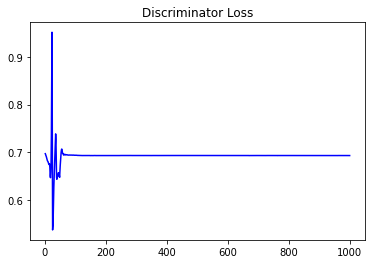

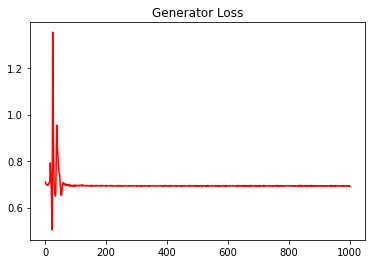

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.014314068646574196


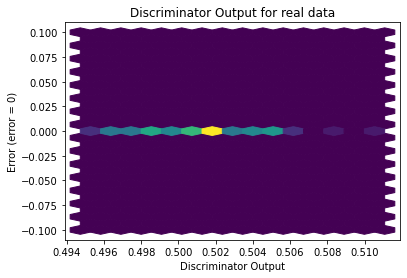

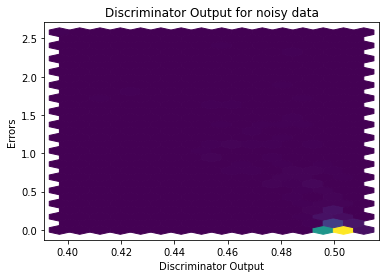

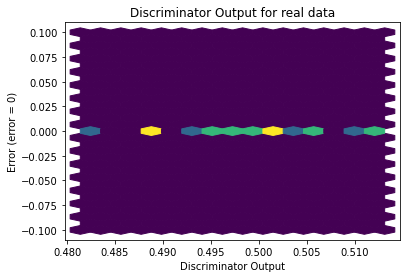

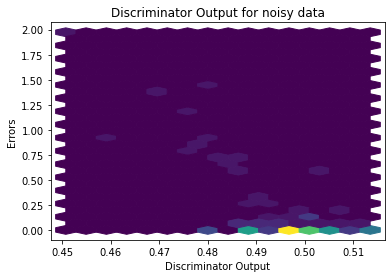

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


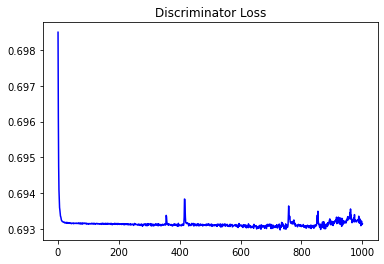

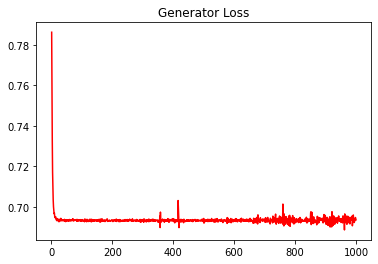

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.05556905080045722


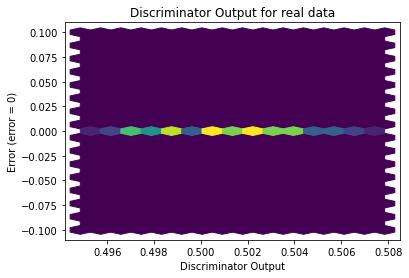

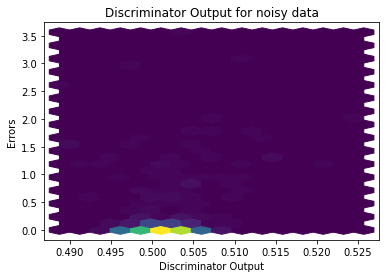

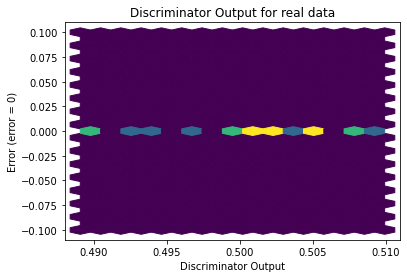

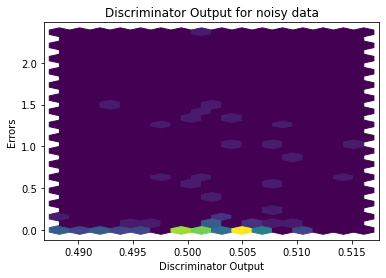

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0125]], requires_grad=True)
